<a href="https://colab.research.google.com/github/Shourya306/EDA-Analaysis/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
# Importing all the relevent libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date


In [ ]:
pd.set_option('display.max_columns', None)     # This code is used to make pandas display all the columns in the dateset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Module 1/M1 - Capstone project/Copy of Global Terrorism Data.csv'
# Encoded with "latin-1" because the default encoding wasn't able to encode the this large file 
full_df = pd.read_csv(file_path, encoding = 'latin-1', low_memory = False)  

In [ ]:
full_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
full_df.shape

(181691, 135)

In [ ]:
# Finding out the percentage of null values in an example column.
null_values_weaptype2_txt = full_df[full_df['weaptype2_txt'].isnull()]
Percentage_null_values_weaptype2_txt = (len(null_values_weaptype2_txt['weaptype2_txt']) / len(full_df['weaptype2_txt'])) * 100
round(Percentage_null_values_weaptype2_txt,2)

92.78

* There are **135 columns** in the dateset and it dosen't have sense to analyse all the features of the dateset because:

    1.Most of the features/columns in the dataset contain the same 
    information as the other columns (e.g weaptype1_txt & weaptype2_txt).

    2.And also these columns(not relevent columns) contain a lot of 
    null information (e.g weaptype2_txt contains 93% percent null values.

* So I will subset the above dateset with only those columns that meet the 
satisfy the above 2 conditions

In [ ]:
# Subsetting the dataset.
subset_df = full_df[['iyear','imonth','iday','extended','country_txt','region_txt','city','latitude','longitude','success','suicide','attacktype1_txt',
                'targtype1_txt','gname','motive','weaptype1_txt','nkill','nwound']]

In [ ]:
subset_df.shape

(181691, 18)

In [ ]:
# Making a copy of the subseted dataframe and working only on the copy of the subseted dataframe.
df = subset_df.copy()

In [ ]:
# Now it's time to rename the columns to make it more intuitive as to what the columns speak.
df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type',
                            'targtype1_txt':'target','gname':'organisation','weaptype1_txt':'weapon_type','nkill':'killed','nwound':'wounded'},
                 inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          181691 non-null  int64  
 1   month         181691 non-null  int64  
 2   day           181691 non-null  int64  
 3   extended      181691 non-null  int64  
 4   country       181691 non-null  object 
 5   region        181691 non-null  object 
 6   city          181257 non-null  object 
 7   latitude      177135 non-null  float64
 8   longitude     177134 non-null  float64
 9   success       181691 non-null  int64  
 10  suicide       181691 non-null  int64  
 11  attack_type   181691 non-null  object 
 12  target        181691 non-null  object 
 13  organisation  181691 non-null  object 
 14  motive        50561 non-null   object 
 15  weapon_type   181691 non-null  object 
 16  killed        171378 non-null  float64
 17  wounded       165380 non-null  float64
dtypes: f

In [ ]:
df.head()

,year,month,day,extended,country,region,city,latitude,longitude,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


Before we proceed any further lets understand what each of the columns means.
  * year = The year in which attack has taken place.
  * month = The month(represented in numbers) in which the attack has taken   place.
  * day = The day in which the attack has taken place.
  * extended = If the attacked has extended for more than one day then value 1 is assigned and if it isn't then value 0 is assigned.
  * country = The country in which the incident took place.
  * city = The city in which the incident took place.
  * latitude = This feild represents the latitude.
  * longitude = This feild represents the longitude.
  * success = This feild informs us whether the attack was a success or a failure(0 = failure, 1 = Success).
  * suicide = This feild informs us whether the attack was a suicidal or not
  (0 = not suicidal, 1. = suicidal)
  * attack_type = The type of attack.
  * target = The type of target/victim.
  * organisation = Terrorist Organisation that has claimed the attack.
  * motive = The motive behind the attack.
  * weapon_type = The type of weapon used in the attack.
  * killed = The number of people killed in that attack.
  * wounded = The number of people wounded in that attack.

I have divided the **EDA** into 2 parts:
  
  * Part 1 = **Data Cleaning**
  * Part 2 = **Data Analysis**

So let's begin with **Data Cleaning**

In [ ]:
# Converting the month column values into months by creating a function and then applying it on every row of the month column.
df['month'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [ ]:
def month_conversion(num):
  if num == 0:
     num = 'data not present'
  elif num == 1:
     num = 'jan'
  elif num == 2:
     num = 'feb'
  elif num == 3:
     num = 'mar'
  elif num == 4:
     num = 'apr'
  elif num == 5:
     num = 'may'
  elif num == 6:
     num = 'june'
  elif num == 7:
     num = 'july'
  elif num == 8:
     num = 'aug'
  elif num == 9:
     num = 'sept'
  elif num == 10:
     num = 'oct'
  elif num == 11:
     num = 'nov'
  else:
     num = 'dec'
  return num

In [ ]:
df['month_full'] = df['month'].apply(month_conversion)

In [ ]:
df.head()

,year,month,day,extended,country,region,city,latitude,longitude,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded,month_full
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,july
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,data not present
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,jan
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,jan
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,jan


In [ ]:
# Will be dropping the month column because it is not needed anymore.
df.drop('month',axis = 1, inplace = True)

In [ ]:
df.shape

(181691, 18)

Now lets deal with **null values**

I have replaced the motive column null values with unknown.

and also I have replaced the city column null values with unknown.

In [ ]:
df['motive'].value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                  14889
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                           14430
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                                        

In [ ]:
df['motive'].fillna('Unknown',inplace = True)
df['city'].fillna('Unknown',inplace = True)

In [ ]:
# Checking if there are any null values in motive and city column
df[df['motive'].isnull()]['motive'].count()

0

In [ ]:
df[df['city'].isnull()]['city'].count()

0

Now, Let's move onto the interesting part i.e, the **Data Analysis** part.

# Preliminary analysis

## In which year the most number of attacks took place.

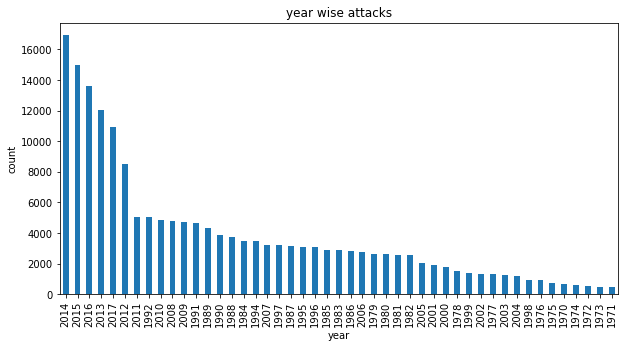

In [ ]:
# Ploting a bar chart 
attacks_year_wise = df['year'].value_counts()
attacks_year_wise.plot(kind = 'bar')
plt.title('year wise attacks')
plt.xlabel('year')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (10, 10)

 **The most number of attacks took place in the year 2014.**


## In which month the most number of attacks took place.

My Hypotesis - Attacks will take place usually in the festive season.

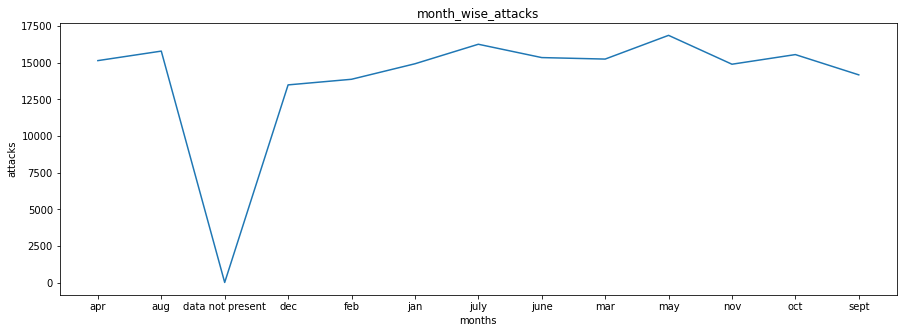

In [ ]:
# Plotting a line graph to check if my hypotesis is true or false.
attacks_month_wise = df.groupby('month_full')['day'].count()
plt.plot(attacks_month_wise)
plt.title('month_wise_attacks')
plt.xlabel('months')
plt.ylabel('attacks')
plt.rcParams['figure.figsize'] = (20, 5)

**From the above line graph we can say that my hypothesis is false. The number of attacks are constant through out the year.**

## In which country the most number of attacks has taken place.

My Hypotesis - It must be Syria(I hear all the time in the news regarding the terror attacks that took place in syria).

In [ ]:
# Top 10 most terrorized countries
most_terrorized_country = df.groupby('country',as_index = False).agg({'day':'count'}).rename(columns = {'day':'no of attacks'}).sort_values('no of attacks',ascending = False).head(10)

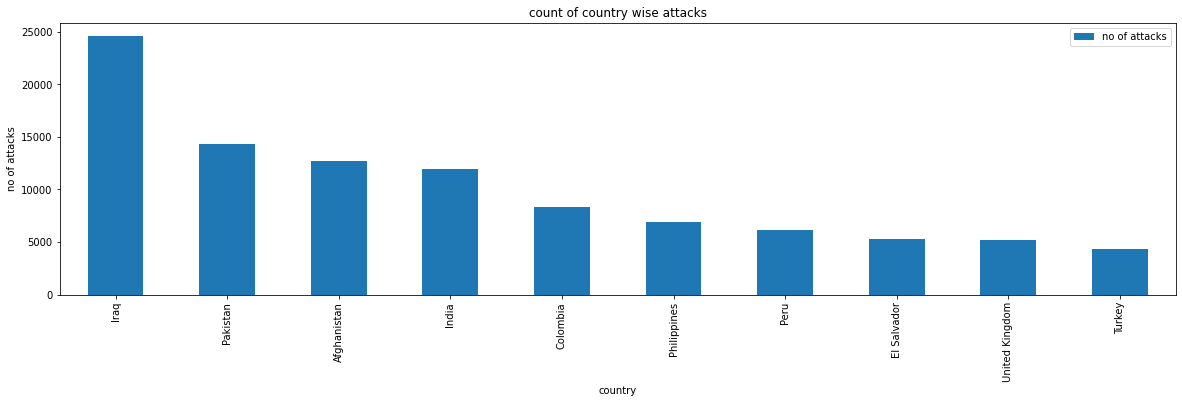

In [ ]:
# Ploting a bar chart
most_terrorized_country.set_index('country',inplace = True)
most_terrorized_country.plot(kind = 'bar')
plt.title('count of country wise attacks')
plt.xlabel('country')
plt.ylabel('no of attacks')
plt.rcParams['figure.figsize'] = (20, 5)

**My hypotesis is wrong again, Iraq is the most terrorized country.**

## let us see the distribution of killed and wounded grouped by countries using a **Box Plot**

In [ ]:
# Total killed and wounded as per the countires
top_killed_wounded_distribution = df.groupby('country').agg({'killed':'sum','wounded':'sum'}).sort_values(['killed','wounded'],ascending = [False,False]).head(10)

Text(0, 0.5, 'sum of killings and wounded')

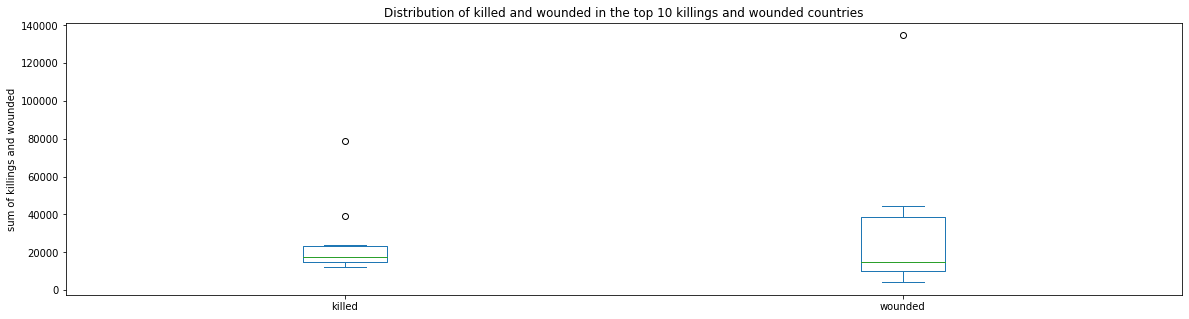

In [ ]:
top_killed_wounded_distribution.plot(kind = 'box')
plt.title('Distribution of killed and wounded in the top 10 killings and wounded countries')
plt.ylabel('sum of killings and wounded')

**The median for both the killed and wounded are the same and also the killed column has 2 outliers but the wounded has only one outlier.**

**The one outlier in the wounded colum is far from the median of wounded column whereas the outliers of the killed column are relatively much closer to the median of the killed.**

## Terrorist Attacks by Region

My Hypotesis - Middle East and North Africa region probably might have the most number of terror attacks

Text(0, 0.5, 'Number of Attacks')

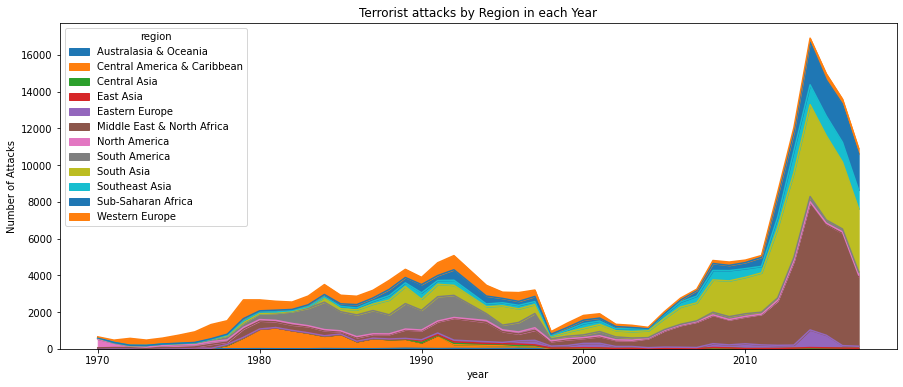

In [ ]:
# Plotting terror attacks as per the region
pd.crosstab(df.year, df.region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist attacks by Region in each Year')
plt.ylabel('Number of Attacks')

**Yayy!! my Hypotesis is sort of true**

**From the above area chart/graph we can see that middle east and north africa have to most number of terror attacks**


# In-Deapth analysis of Terorrism in Iraq, the country with the most number of attacks, and Terrorism in India.

In [288]:
iraq_df = df[df['country'] == 'Iraq']
iraq_df = iraq_df[~iraq_df.isnull()]
india_df = df[(df['country'] == 'India') & (df['city'] != 'Unknown')]

## Lets see in which regions attacks took place the most.

My Hypothesis - Srinager is the most jeopardize in india

In [286]:
iraq_df.head()

,year,day,extended,country,region,city,latitude,longitude,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded,month_full
2854,1975,1,0,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,1,0,Hijacking,Airports & Aircraft,Unknown,Unknown,Unknown,0.0,1.0,mar
4385,1976,15,0,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,10.0,285.0,dec
4393,1976,18,1,Iraq,Middle East & North Africa,Penjwon,NaN,NaN,1,0,Hostage Taking (Kidnapping),Government (General),Kurdish Democratic Party-Iraq (KDP),Unknown,Unknown,0.0,0.0,dec
4402,1976,24,0,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,1,0,Assassination,Violent Political Party,Unknown,Unknown,Firearms,2.0,0.0,dec
8688,1979,15,0,Iraq,Middle East & North Africa,Basra,30.510054,47.778095,1,0,Assassination,Government (General),Unknown,Unknown,Unknown,1.0,0.0,june


In [289]:
india_df.head()

,year,day,extended,country,region,city,latitude,longitude,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded,month_full
1186,1972,22,0,India,South Asia,New Delhi,28.585836,77.153336,1,0,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0,feb
2764,1975,2,0,India,South Asia,Samastipur,25.863042,85.781004,1,0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,jan
3857,1976,26,0,India,South Asia,New Delhi,28.585836,77.153336,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,may
5327,1977,28,0,India,South Asia,Bombay,19.075984,72.877656,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.0,0.0,sept
7342,1979,14,0,India,South Asia,Imphal,24.798346,93.940430,1,0,Assassination,Government (General),Unknown,Unknown,Firearms,3.0,0.0,jan


In [290]:
# Top 5 iraq cities that were attacked the most.
iraq_top_targetted_cities = iraq_df.groupby('city').agg({'day':'count'}).rename(columns = {'day':'attacks'}).sort_values('attacks',ascending = False).head(5)
india_top_targetted_cities = india_df.groupby('city').agg({'day':'count'}).rename(columns = {'day':'attacks'}).sort_values('attacks',ascending = False).head(5)

In [291]:
# Concadinating both the dataframes so that I can make an easy comparison among those two countries.
india_iraq_df = pd.concat([india_top_targetted_cities,iraq_top_targetted_cities],axis = 1)

Text(0, 0.5, 'total number of attacks')

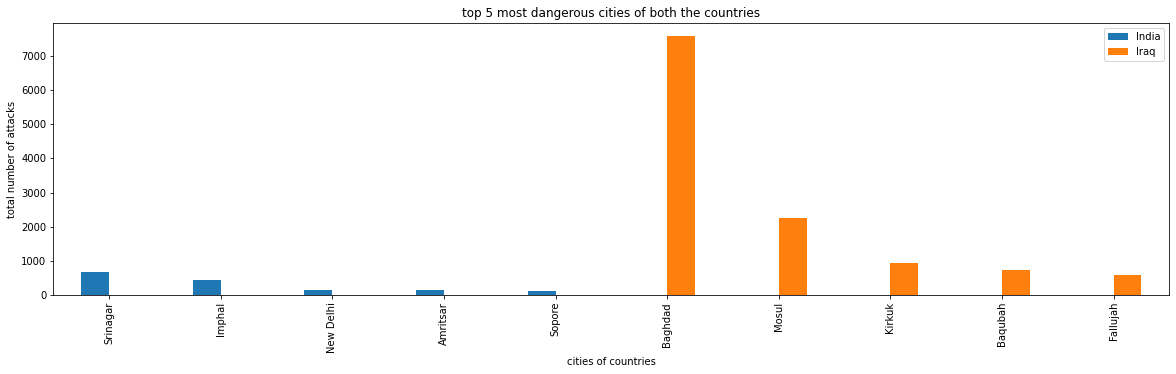

In [292]:
# Ploting them in a Basic Bar Graph.
india_iraq_df.plot(kind = 'bar')
plt.legend(['India','Iraq'])
plt.title('top 5 most dangerous cities of both the countries')
plt.xlabel('cities of countries')
plt.ylabel('total number of attacks')


**My Hypothesis is True**

**When amount of threat faced by Iraq is way more than the threat faced by india**

**From this analysis we can safely conclude that India counters terror better than Iraq**

## The type of attack that took place.

In [294]:
india_df.head()

,year,day,extended,country,region,city,latitude,longitude,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded,month_full
1186,1972,22,0,India,South Asia,New Delhi,28.585836,77.153336,1,0,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0,feb
2764,1975,2,0,India,South Asia,Samastipur,25.863042,85.781004,1,0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,jan
3857,1976,26,0,India,South Asia,New Delhi,28.585836,77.153336,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0,may
5327,1977,28,0,India,South Asia,Bombay,19.075984,72.877656,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.0,0.0,sept
7342,1979,14,0,India,South Asia,Imphal,24.798346,93.940430,1,0,Assassination,Government (General),Unknown,Unknown,Firearms,3.0,0.0,jan


In [307]:
# Code for finding out the most common attack type used.
india_attack_type = india_df.groupby('attack_type').agg({'day':'count'}).rename(columns = {'day':'count of attack type'}).sort_values('count of attack type',ascending = False).head(3)
iraq_attack_type = iraq_df.groupby('attack_type').agg({'day':'count'}).rename(columns = {'day':'count of attack type'}).sort_values('count of attack type',ascending = False).head(3)

In [308]:
# Concadinating both countries attack types.
india_iraq_attack_type = pd.concat([india_attack_type,iraq_attack_type], axis = 1)

Text(0, 0.5, 'Count of attack type')

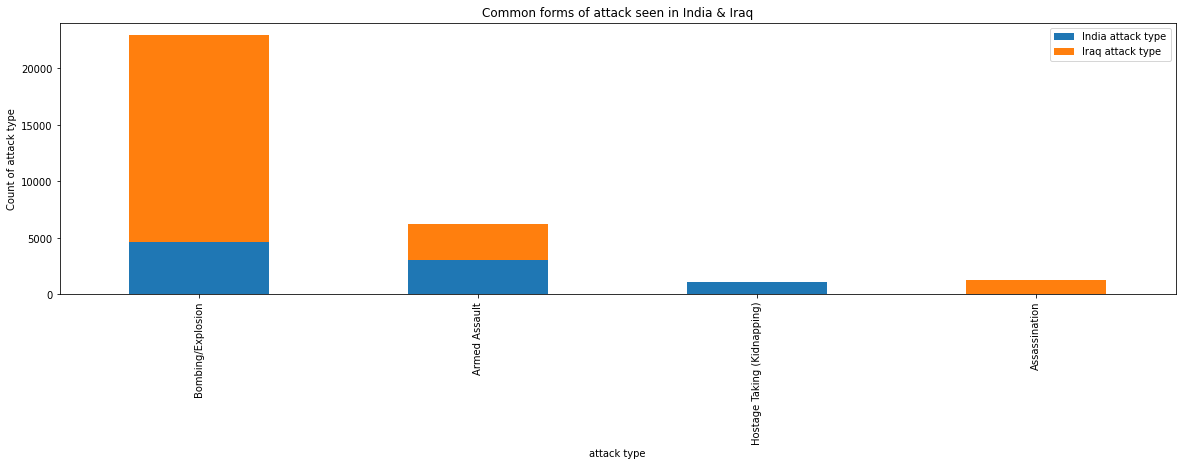

In [310]:
# Stacked Bar Plot.
india_iraq_attack_type.plot(kind = 'bar', stacked = True)
plt.legend(['India attack type','Iraq attack type'])
plt.title('Common forms of attack seen in India & Iraq')
plt.xlabel('attack type')
plt.ylabel('Count of attack type')

**Bombing/Explosion is used the most in both the countries as a form attack**

**Kidnapping form of attack is only used in India and not Iraq**

**Assassination is only done in Iraq**

## What the terror organisations target the most in India and in Iraq.


In [324]:
india_df = india_df[india_df['organisation'] != 'Unknown']
iraq_df = iraq_df[iraq_df['organisation'] != 'Unknown']

In [339]:
iraq_target = iraq_df.groupby('target', as_index = False).agg({'day':'count'}).rename(columns = {'day':'times targeted'}).sort_values('times targeted', ascending = False).head(5)
india_target = india_df.groupby('target', as_index = False).agg({'day':'count'}).rename(columns = {'day':'times targeted'}).sort_values('times targeted', ascending = False).head(5)

In [340]:
# Concatinating both the dataframes
india_iraq_target = pd.concat([india_target,iraq_target],axis = 1)

In [343]:
# Setting the index as target
india_iraq_target.set_index('target', inplace = True)

Text(0, 0.5, 'Times Attacked')

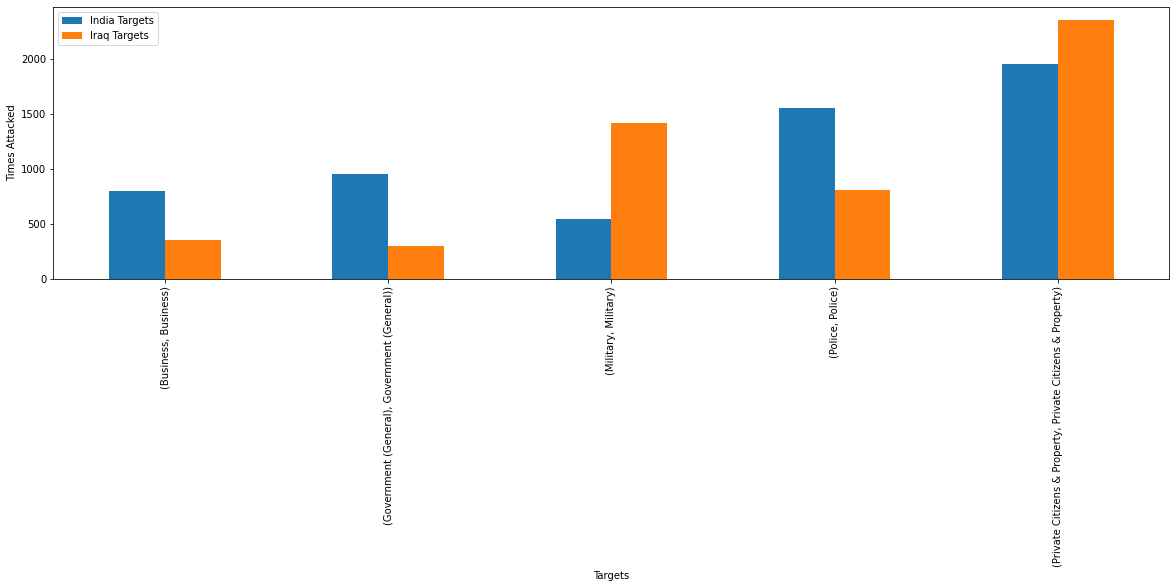

In [350]:
india_iraq_target.plot(kind = 'bar')
plt.legend(['India Targets','Iraq Targets'])
plt.xlabel('Targets')
plt.ylabel('Times Attacked')

**The terrorist organisations target the same groups in both the countires but the count of attacks vary from target to target between both the countries**